In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.manifold import TSNE

# Vader NYT Dataset

The dataset was created by having a minimum of 20 human raters review 5,190 sentence-level snippets from 500 New York Times editorial/opinion articles and give each a sentiment score between -4 and 4, where -4 is extremely negative sentiment and 4 is extremely positive sentiment.

## Loading in the Data

In [2]:
vader = pd.read_csv("../../../data/vader_nyt/raw_binned_nytEditorialSnippets.csv", index_col=[0])

In [3]:
vader.head()

,id,meanSentimentRating,textSnippet,sentimentScore
0,1_1,0.40,"On Dec. 19, around noon, New York City's Union...",1
1,1_2,0.15,"Events include sprinting, broad jumping, yule ...",1
2,1_3,1.50,It's mainly a holiday celebration - toys from ...,1
3,1_4,-0.05,But the games also convey another message.,0
4,1_5,-1.15,"According to Clement C. Moore, author of ''A V...",0


## EDA

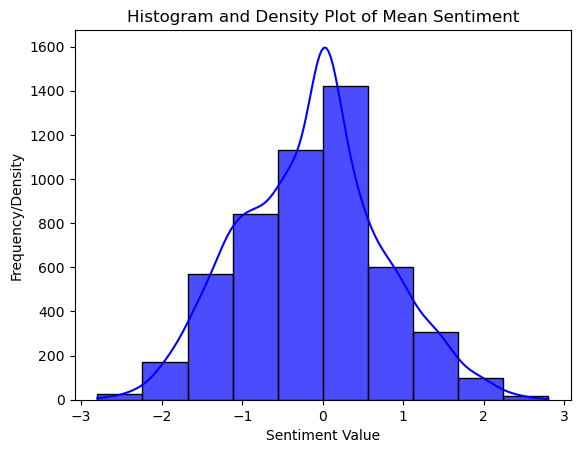

In [8]:
sns.histplot(vader['meanSentimentRating'], bins=10, kde=True, color='blue', alpha=0.7, edgecolor='black')
plt.title("Histogram and Density Plot of Mean Sentiment")
plt.xlabel("Sentiment Value")
plt.ylabel("Frequency/Density")
plt.show()

The dataset is slightly skewed towards negative sentiment, and is centered  around 0 (or neutral sentiment)

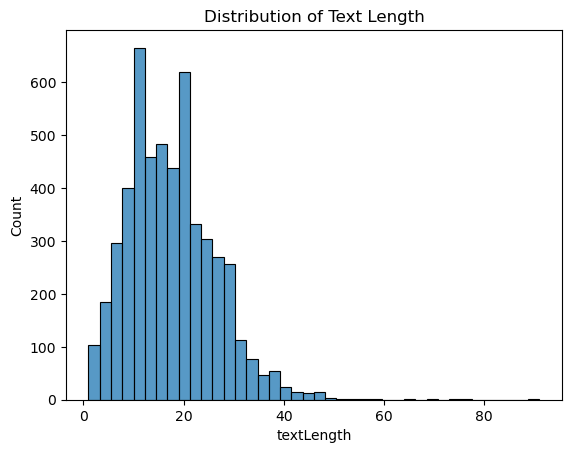

In [9]:
vader['textLength'] = vader['textSnippet'].apply(lambda x:len(str(x).split()))
plt.title("Distribution of Text Length")
sns.histplot(data=vader, x="textLength",bins=40)
plt.show()

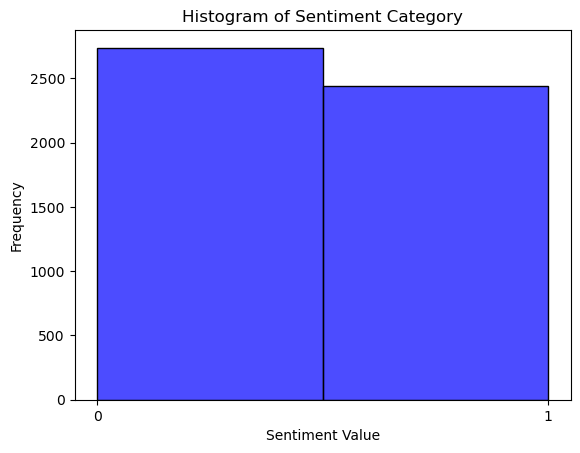

In [10]:
sns.histplot(vader['sentimentScore'], bins=2, color='blue', alpha=0.7, edgecolor='black')
plt.title("Histogram of Sentiment Category")
plt.xlabel("Sentiment Value")
plt.ylabel("Frequency")
plt.xticks([0, 1], ['0', '1'])
plt.show()

## t-SNE/UMAP

In [13]:
vader_tfidf = pd.read_csv("../../../data/vader_nyt/tfidf_nytEditorialSnippets.csv")
sentiments_tfidf = vader_tfidf['sentimentScore']
vader_tfidf.drop(columns=['sentimentScore', 'Unnamed: 0', 'meanSentimentRating'], inplace=True)

vader_tfidf_tsne = TSNE(n_components=2, learning_rate='auto',
                  init='random', perplexity=3).fit_transform(vader_tfidf)

In [14]:
vader_bert = pd.read_csv("../../../data/vader_nyt/bert_nytEditorialSnippets.csv")
sentiments_bert = vader_bert['sentimentScore']
vader_bert.drop(columns=['sentimentScore', 'Unnamed: 0', 'meanSentimentRating'], inplace=True)

vader_bert_tsne = TSNE(n_components=2, learning_rate='auto',
                  init='random', perplexity=3).fit_transform(vader_bert)

C:\Users\Lo\AppData\Local\Temp\ipykernel_7912\920399300.py:9: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(
C:\Users\Lo\AppData\Local\Temp\ipykernel_7912\920399300.py:20: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(


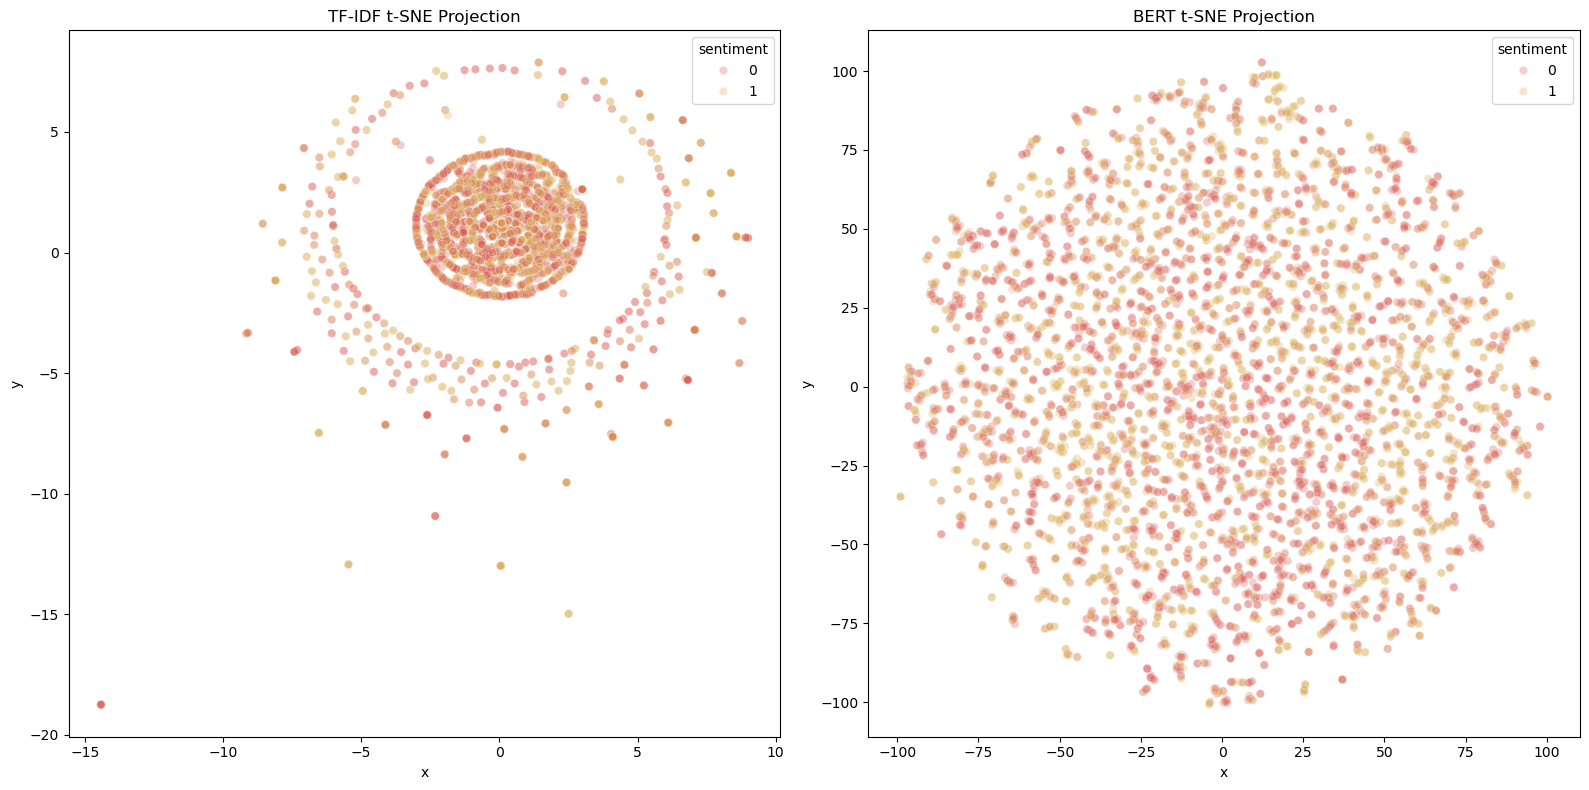

In [15]:
df_tfidf = pd.DataFrame(vader_tfidf_tsne, columns=["x", "y"])
df_bert = pd.DataFrame(vader_bert_tsne, columns=["x", "y"])

df_tfidf["sentiment"] = sentiments_tfidf
df_bert["sentiment"] = sentiments_bert

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

sns.scatterplot(
    ax=axes[0],
    x="x", y="y",
    hue="sentiment",
    palette=sns.color_palette("hls", 10),
    data=df_tfidf,
    legend="full",
    alpha=0.3
)
axes[0].set_title("TF-IDF t-SNE Projection")

sns.scatterplot(
    ax=axes[1],
    x="x", y="y",
    hue="sentiment",
    palette=sns.color_palette("hls", 10),
    data=df_bert,
    legend="full",
    alpha=0.3
)
axes[1].set_title("BERT t-SNE Projection")

plt.tight_layout()
plt.show()

# Yelp Reviews

In [16]:
yelp = pd.read_csv("../../../data/yelp/raw_yelp_sample.csv", index_col=[0])

In [21]:
yelp.head()

,stars,text,sentimentScore
6820470,1,Drove one and half hour there. Waited for an h...,0
6251359,1,So I gave this place a bad review the first ti...,0
6128778,2,Flowers looked good. They dropped them off hou...,0
2758457,1,As I sit here I am watching the cook wipe the ...,0
427928,1,This is not another Patron review made by many...,0


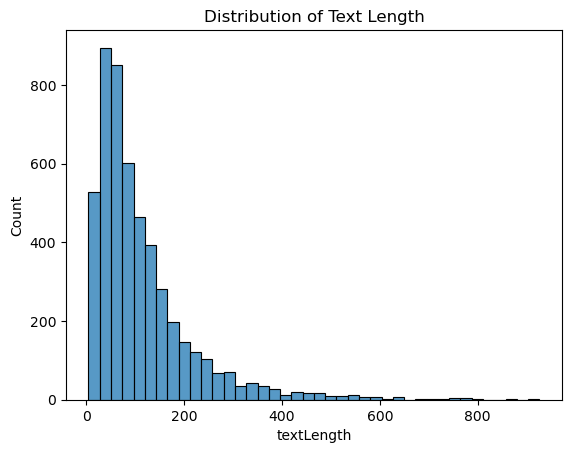

In [22]:
yelp['textLength'] = yelp['text'].apply(lambda x:len(str(x).split()))
plt.title("Distribution of Text Length")
sns.histplot(data=yelp, x="textLength",bins=40)
plt.show()

## t-SNE

In [18]:
yelp_tfidf = pd.read_csv("../../../data/yelp/tfidf_yelp_sample.csv")
sentiments_tfidf = yelp_tfidf['sentimentScore']
yelp_tfidf.drop(columns=['sentimentScore', 'Unnamed: 0'], inplace=True)

yelp_tfidf_tsne = TSNE(n_components=2, learning_rate='auto',
                  init='random', perplexity=3).fit_transform(yelp_tfidf)

In [19]:
yelp_bert = pd.read_csv("../../../data/yelp/bert_yelp_sample.csv")
sentiments_bert = yelp_bert['sentimentScore']
yelp_bert.drop(columns=['sentimentScore', 'Unnamed: 0', 'Unnamed: 0.1'], inplace=True)

yelp_bert_tsne = TSNE(n_components=2, learning_rate='auto',
                  init='random', perplexity=3).fit_transform(yelp_bert)

C:\Users\Lo\AppData\Local\Temp\ipykernel_7912\3040427658.py:9: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(
C:\Users\Lo\AppData\Local\Temp\ipykernel_7912\3040427658.py:20: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(


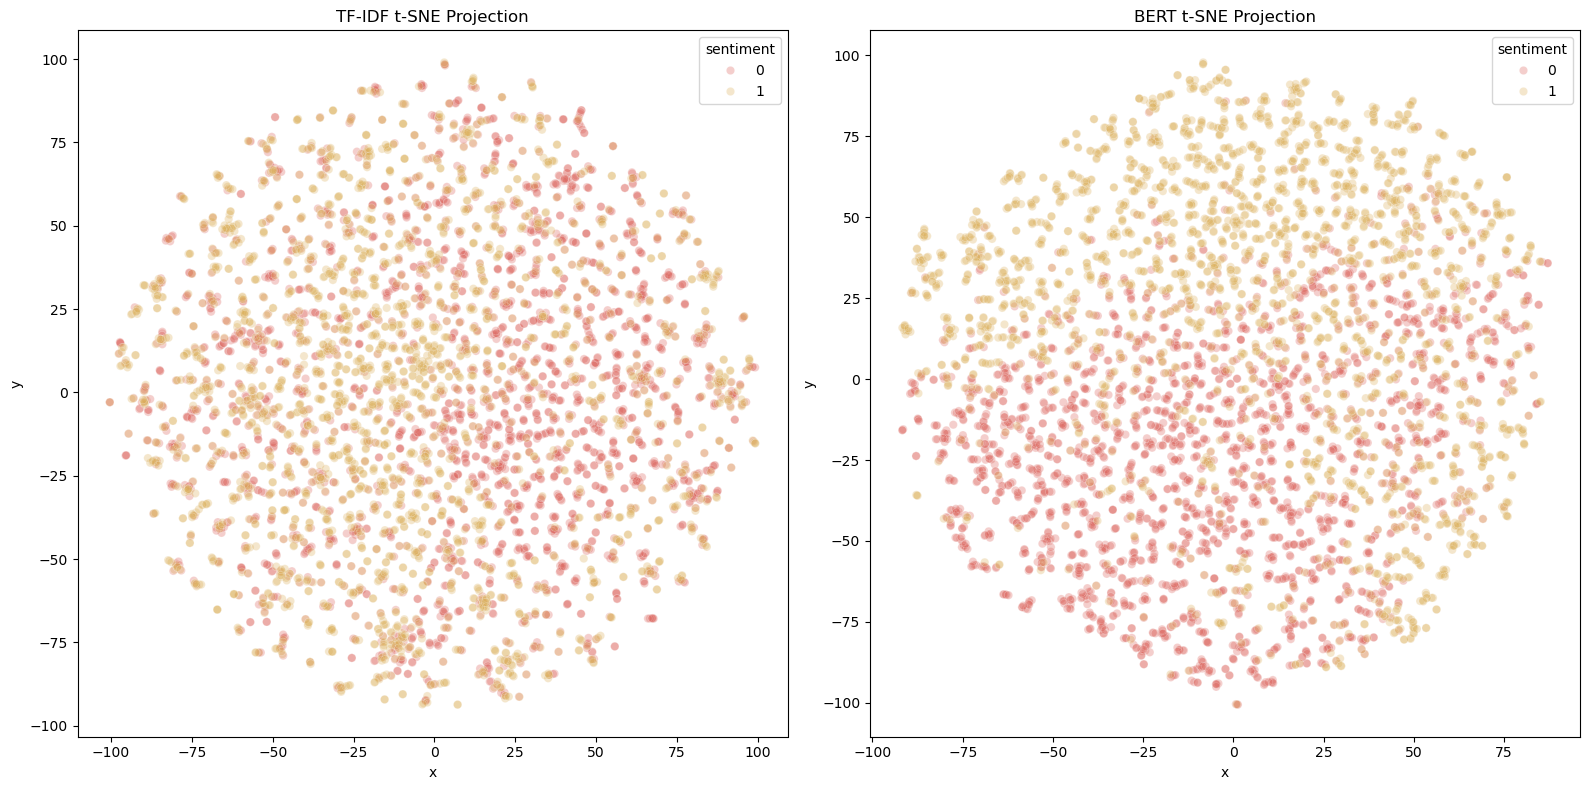

In [20]:
df_tfidf = pd.DataFrame(yelp_tfidf_tsne, columns=["x", "y"])
df_bert = pd.DataFrame(yelp_bert_tsne, columns=["x", "y"])

df_tfidf["sentiment"] = sentiments_tfidf
df_bert["sentiment"] = sentiments_bert

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

sns.scatterplot(
    ax=axes[0],
    x="x", y="y",
    hue="sentiment",
    palette=sns.color_palette("hls", 10),
    data=df_tfidf,
    legend="full",
    alpha=0.3
)
axes[0].set_title("TF-IDF t-SNE Projection")

sns.scatterplot(
    ax=axes[1],
    x="x", y="y",
    hue="sentiment",
    palette=sns.color_palette("hls", 10),
    data=df_bert,
    legend="full",
    alpha=0.3
)
axes[1].set_title("BERT t-SNE Projection")

plt.tight_layout()
plt.show()